# Lead_Score_Case _Study

## Problem Stament:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

The solution is divided into the following sections:

Data understanding and exploration

Data Visualisation


Data preparation


Model building and evaluation

# Importing libraries

In [1]:
#Importing libraries

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
warnings.filterwarnings("error")

from sklearn.model_selection              import train_test_split
from sklearn.preprocessing                import StandardScaler
from sklearn.linear_model                 import LogisticRegression
from sklearn.metrics                      import accuracy_score, confusion_matrix,precision_score, classification_report
from imblearn.over_sampling               import SMOTENC
from sklearn.model_selection              import train_test_split
from sklearn.datasets                     import make_classification
from collections                          import Counter
from sklearn.feature_selection            import RFE
from sklearn.metrics                      import recall_score
from sklearn.metrics                      import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Data Understanding and Exploration

In [2]:
Lead=pd.read_csv("Leads.csv")
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Let's look at the number of rows and columns in the dataset
Lead.shape

(9240, 37)

In [4]:
# Understanding the feature names in the dataset
Lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Getting insights of the features
# summary of all the numeric columns

Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Summary of dataset
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

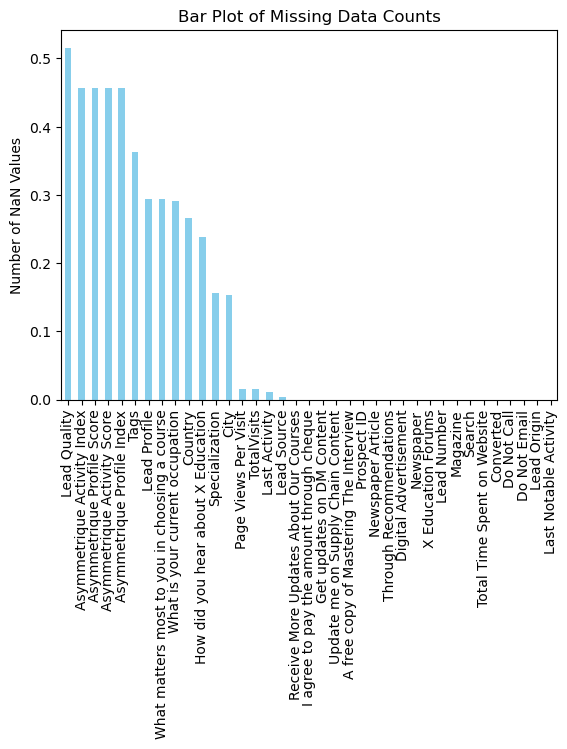

In [7]:
# Bar plot showing count of NaN values per column
(Lead.isnull().sum()/len(Lead)).sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Bar Plot of Missing Data Counts')
plt.ylabel('Number of NaN Values')
plt.show()

In [8]:
#Analysing above columns for null value treatment
Null_col = pd.DataFrame((Lead.isnull().sum()/len(Lead)).sort_values(ascending=False)).reset_index().rename(columns={"index":"column_name",0:"Null_per"})
Null_col.head()

,column_name,Null_per
0,Lead Quality,0.515909
1,Asymmetrique Activity Index,0.456494
2,Asymmetrique Profile Score,0.456494
3,Asymmetrique Activity Score,0.456494
4,Asymmetrique Profile Index,0.456494


In [9]:
#Filtering columns with null percentage
Null_per_col=Null_col[Null_col["Null_per"]>0]["column_name"].to_list()
Null_per_col

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education',
 'Specialization',
 'City',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

In [10]:
#Dropping columns with null percentage >40
Null_col_drop = Null_col[Null_col["Null_per"]>0.2]["column_name"].to_list()
Null_col_drop

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education']

In [11]:
#Creating list of null columns which are to analysed
col = list(set(Null_per_col)-(set(Null_col_drop)))
col

['City',
 'Specialization',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

In [12]:
#Filtering categorical variables
Lead_null_cat_col = Lead[col].select_dtypes(include=["object"]).columns.to_list()
Lead_null_cat_col

['City', 'Specialization', 'Last Activity', 'Lead Source']

In [13]:
#Filtering numerical variables
Lead_null_num_col = Lead[col].select_dtypes(include=["float64"]).columns.to_list()
Lead_null_num_col

['Page Views Per Visit', 'TotalVisits']

In [14]:
#Additional QC Step
print("Total number of null columns to be analysed",len(col))
print("Total number of cat null columns to be analysed",len(Lead_null_cat_col))
print("Total number of num null columns to be analysed",len(Lead_null_num_col))

Total number of null columns to be analysed 6
Total number of cat null columns to be analysed 4
Total number of num null columns to be analysed 2


# Step 2: Data Visualization

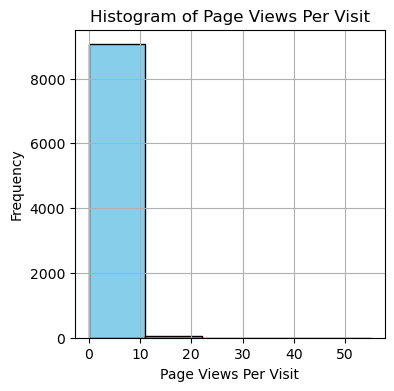

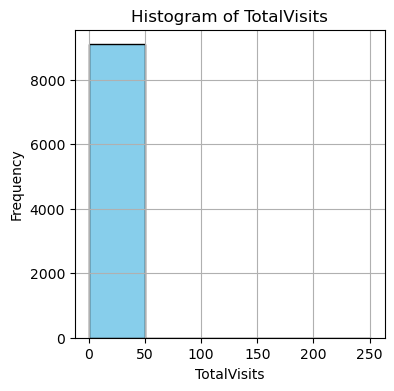

In [15]:
# Iterate over each column in the DataFrame
for column in Lead_null_num_col:
    plt.figure(figsize=(4,4))  # Create a new figure for each histogram
    plt.hist(Lead[column], bins=5, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [16]:
Lead[Lead_null_num_col].describe()

,Page Views Per Visit,TotalVisits
count,9103.000000,9103.000000
mean,2.362820,3.445238
std,2.161418,4.854853
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
max,55.000000,251.000000


In [17]:
np.percentile(Lead['Page Views Per Visit'].dropna(), [25, 35, 45, 55, 65, 75, 80, 85, 90, 95, 97, 98, 99,99.5,99.9,99.999])

array([ 1.     ,  1.5    ,  2.     ,  2.     ,  3.     ,  3.     ,
        4.     ,  4.     ,  5.     ,  6.     ,  7.     ,  8.     ,
        9.     , 11.     , 14.449  , 52.17838])

In [18]:
np.percentile(Lead['TotalVisits'].dropna(), [25, 35, 45, 55, 65, 75, 80, 85, 90, 95, 97, 98, 99,99.5,99.9,99.999])

array([  1.    ,   2.    ,   2.    ,   3.    ,   4.    ,   5.    ,
         5.    ,   6.    ,   7.    ,  10.    ,  11.    ,  13.    ,
        17.    ,  21.    ,  31.796 , 240.9878])

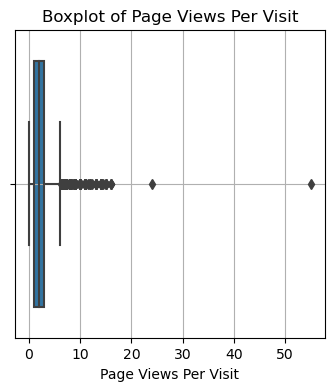

In [19]:
# Create a figure with a specific size
plt.figure(figsize=(4, 4))

# Create a boxplot
sns.boxplot(x=Lead['Page Views Per Visit'].dropna())

# Customize the plot
plt.title('Boxplot of Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.grid(True)

# Show the plot
plt.show()

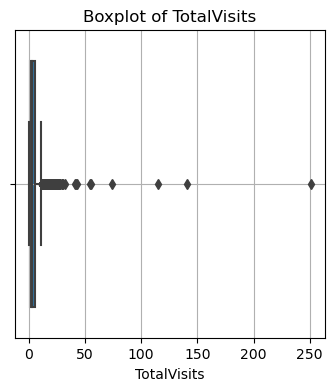

In [20]:
# Create a figure with a specific size
plt.figure(figsize=(4, 4))

# Create a boxplot
sns.boxplot(x=Lead['TotalVisits'].dropna())

# Customize the plot
plt.title('Boxplot of TotalVisits')
plt.xlabel('TotalVisits')
plt.grid(True)

# Show the plot
plt.show()

In [21]:
# Calculate the quartiles and IQR
Q1 = Lead['Page Views Per Visit'].quantile(0.25)
Q3 = Lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
print('Page Views Per Visit')
print("lower bound for Page Views Per Visit",Q1 - 1.5 * IQR)
print("upper bound for Page Views Per Visit",Q3 + 1.5 * IQR)

Page Views Per Visit
lower bound for Page Views Per Visit -2.0
upper bound for Page Views Per Visit 6.0


In [22]:
# Calculate the quartiles and IQR
Q1 = Lead["TotalVisits"].quantile(0.25)
Q3 = Lead["TotalVisits"].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
print("TotalVisits")
print("lower bound for Page Views Per Visit",Q1 - 1.5 * IQR)
print("upper bound for Page Views Per Visit",Q3 + 1.5 * IQR)

TotalVisits
lower bound for Page Views Per Visit -5.0
upper bound for Page Views Per Visit 11.0


In [23]:
#Replacing null values with mean by excluding bounds
print("Mean of Page Views Per Visit by excluding upper bound",Lead[Lead['Page Views Per Visit']>6]["Page Views Per Visit"].mean())
print("Median of Page Views Per Visit by excluding upper bound",Lead[Lead['Page Views Per Visit']>6]["Page Views Per Visit"].median())
print("Mean of TotalVisits by excluding upper bound",Lead[Lead['TotalVisits']>6]["Page Views Per Visit"].mean())
print("Median  of TotalVisits by excluding upper bound",Lead[Lead['TotalVisits']>6]["Page Views Per Visit"].median())

Mean of Page Views Per Visit by excluding upper bound 8.62661111111111
Median of Page Views Per Visit by excluding upper bound 8.0
Mean of TotalVisits by excluding upper bound 4.845025773195877
Median  of TotalVisits by excluding upper bound 3.67


In [24]:
#Checking the 50th pecentile excluding outliers
print("Page View 50th Percentile",(np.percentile(Lead[Lead['Page Views Per Visit']>6]["Page Views Per Visit"].dropna(), [50])))
print("TotalVisits 50th Percentile",(np.percentile(Lead[Lead['TotalVisits']>6]["Page Views Per Visit"].dropna(), [50])))

Page View 50th Percentile [8.]
TotalVisits 50th Percentile [3.67]


In [25]:
#Checking the 50th pecentile without excluding outliers
print("Page View 50th Percentile",(np.percentile(Lead['Page Views Per Visit'].dropna(), [50])))
print("TotalVisits 50th Percentile",(np.percentile(Lead['TotalVisits'].dropna(), [50])))

Page View 50th Percentile [2.]
TotalVisits 50th Percentile [3.]


In [26]:
#Imputing the null values with median
Lead["Page Views Per Visit"]= Lead["Page Views Per Visit"].fillna(Lead[Lead['Page Views Per Visit']>6]["Page Views Per Visit"].median())
Lead["TotalVisits"]         = Lead["TotalVisits"].fillna(Lead[Lead['TotalVisits']>6]["TotalVisits"].median())

In [27]:
#Checking the 50th pecentile excluding outliers
print("Page View",(Lead[Lead['Page Views Per Visit']>6]["Page Views Per Visit"].count()/len(Lead['Page Views Per Visit'])*100))
print("Page View",(Lead[Lead['TotalVisits']>6]["TotalVisits"].count()/len(Lead['Page Views Per Visit'])*100))

Page View 5.378787878787879
Page View 14.08008658008658


In [28]:
#Filtering numerical variables
Lead_numerical_col = Lead.select_dtypes(include=["float64","int"]).columns.to_list()
Lead_numerical_col

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [29]:
#Filtering out the columns which were not included in null value analysis
Lead_numerical_column = list(set(Lead_numerical_col)-set(Lead_null_num_col))
Lead_numerical_column

['Asymmetrique Activity Score',
 'Converted',
 'Asymmetrique Profile Score',
 'Lead Number',
 'Total Time Spent on Website']

In [30]:
#Categorical columns null value analysis
Lead_null_cat_col

['City', 'Specialization', 'Last Activity', 'Lead Source']

In [31]:
# Checking the null value %
Lead_null_cat_col
np.round((Lead[Lead_null_cat_col].isnull().sum()/len(Lead[Lead_null_cat_col]))*100,2)

City              15.37
Specialization    15.56
Last Activity      1.11
Lead Source        0.39
dtype: float64

## Outlier Analysis

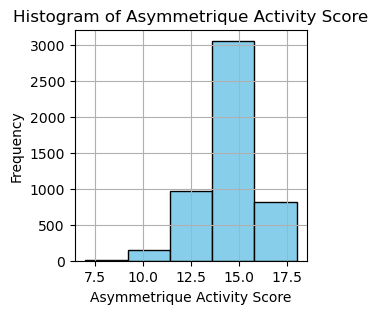

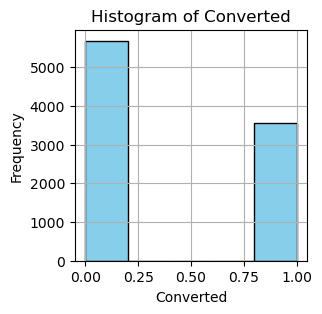

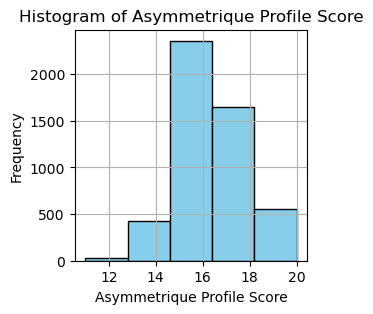

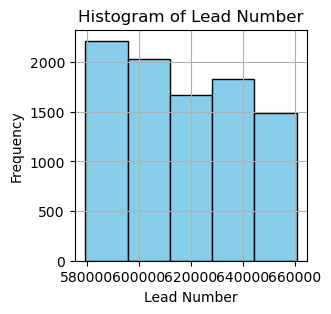

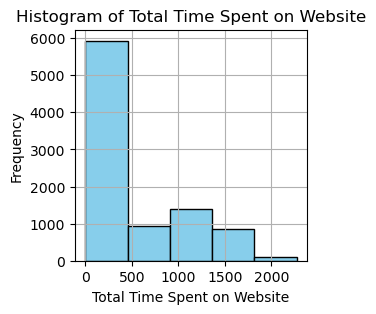

In [32]:
#plotting histogram for above columns
# Iterate over each column in the DataFrame
for column in Lead_numerical_column:
    plt.figure(figsize=(3,3))  # Create a new figure for each histogram
    plt.hist(Lead[column], bins=5, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

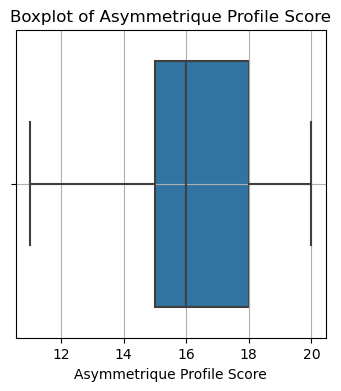

In [33]:
#Creating boxplot of numerical
# Create a figure with a specific size
plt.figure(figsize=(4, 4))

# Create a boxplot
sns.boxplot(x=Lead['Asymmetrique Profile Score'].dropna())

# Customize the plot
plt.title('Boxplot of Asymmetrique Profile Score')
plt.xlabel('Asymmetrique Profile Score')
plt.grid(True)

# Show the plot
plt.show()

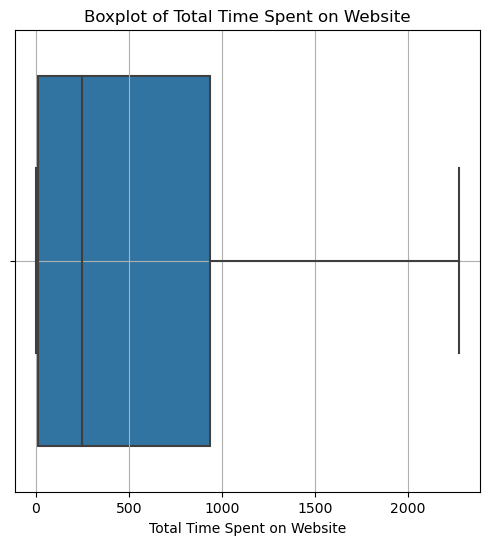

In [34]:
#Creating boxplot of numerical
# Create a figure with a specific size
plt.figure(figsize=(6, 6))

# Create a boxplot
sns.boxplot(x=Lead['Total Time Spent on Website'].dropna())

# Customize the plot
plt.title('Boxplot of Total Time Spent on Website')
plt.xlabel('Total Time Spent on Website')
plt.grid(True)

# Show the plot
plt.show()

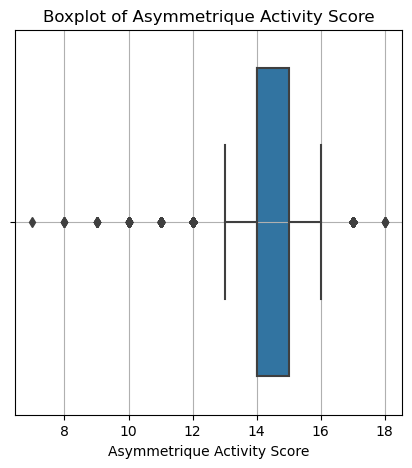

In [35]:
#Creating boxplot of numerical
# Create a figure with a specific size
plt.figure(figsize=(5,5))

# Create a boxplot
sns.boxplot(x=Lead['Asymmetrique Activity Score'].dropna())

# Customize the plot
plt.title('Boxplot of Asymmetrique Activity Score')
plt.xlabel('Asymmetrique Activity Score')
plt.grid(True)

# Show the plot
plt.show()

In [36]:
#Analysis of categorical variables
Lead_categorical_col = Lead.select_dtypes(include=["object"]).columns.to_list()
Lead_categorical_col

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [37]:
Lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [38]:
Lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [39]:
#Converting the "Converted" column in categorical for analysis
print("Count of converted and non-converted leads before transformation", Lead['Converted'].value_counts())
Lead['Converted'] = Lead['Converted'].apply(lambda x: 'Yes' if x==1 else 'No')
print("Count of converted and non-converted leads after transformation", Lead['Converted'].value_counts())

Count of converted and non-converted leads before transformation 0    5679
1    3561
Name: Converted, dtype: int64
Count of converted and non-converted leads after transformation No     5679
Yes    3561
Name: Converted, dtype: int64


In [40]:
#Analysis of all categorical variables
categorical_columns=[
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']


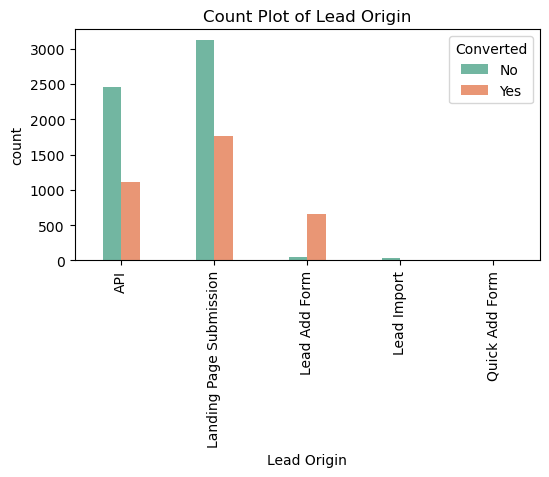

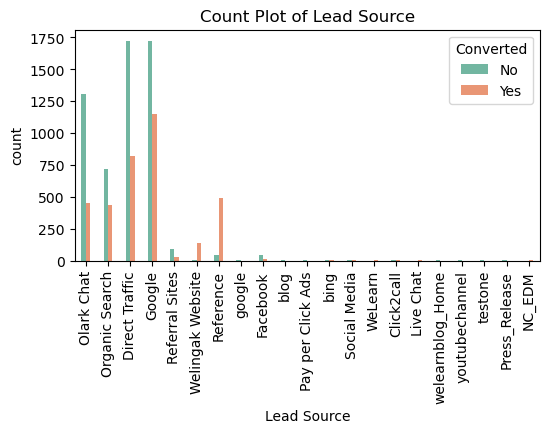

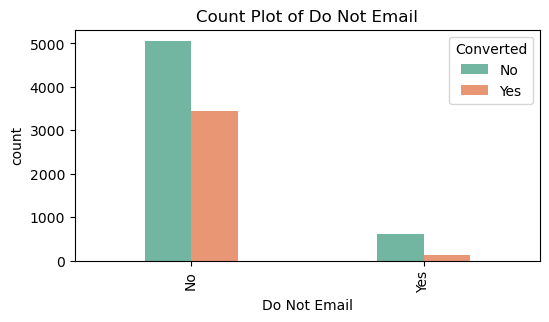

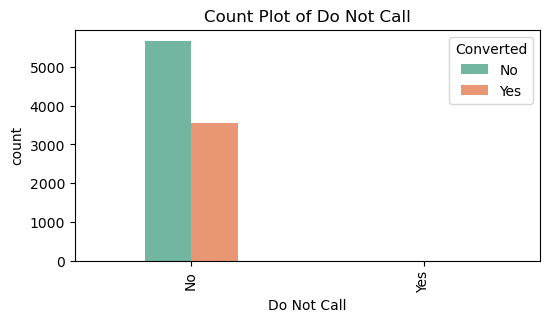

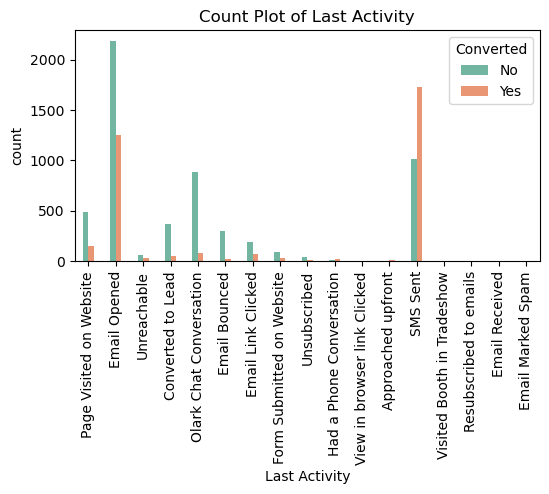

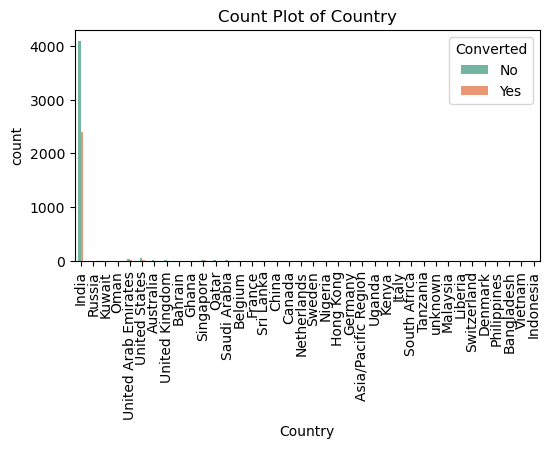

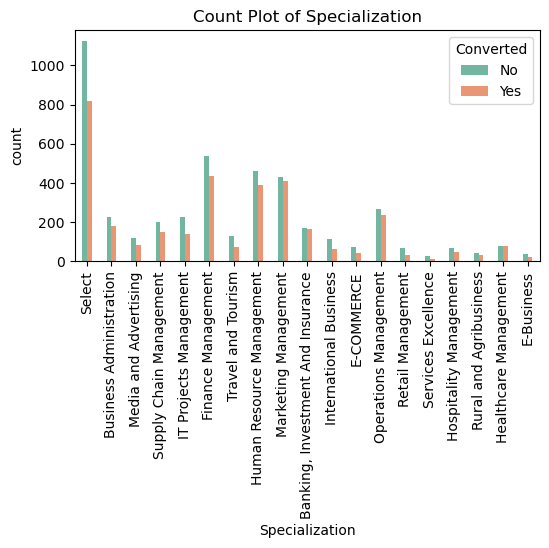

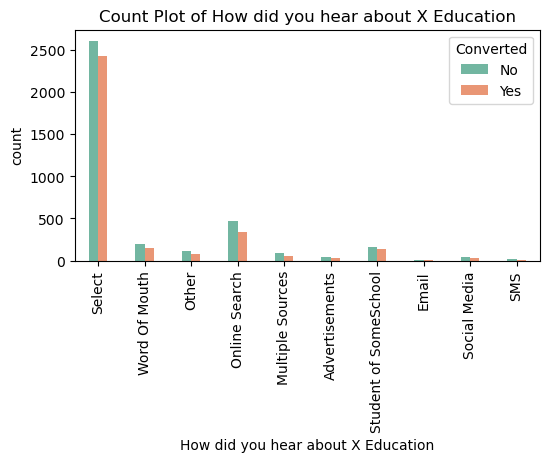

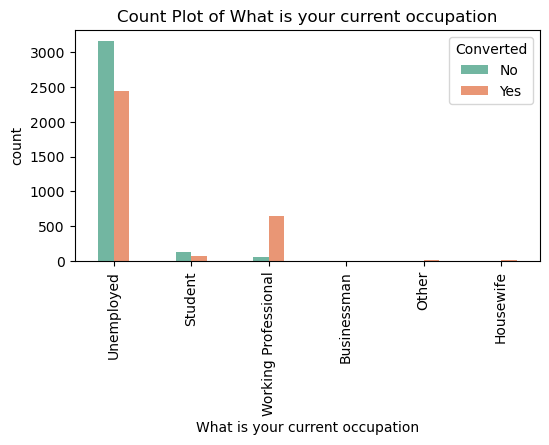

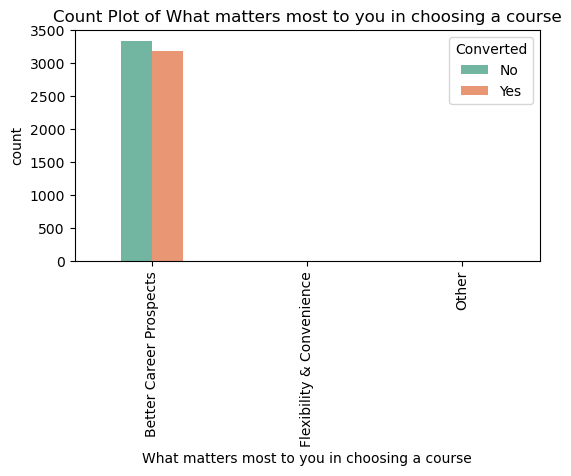

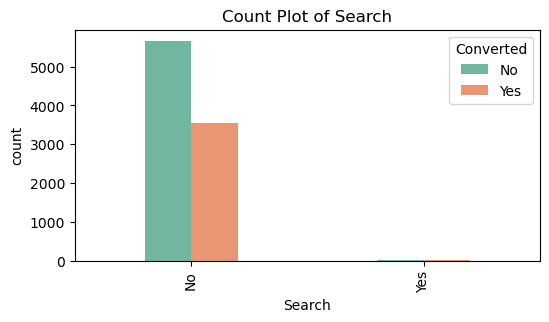

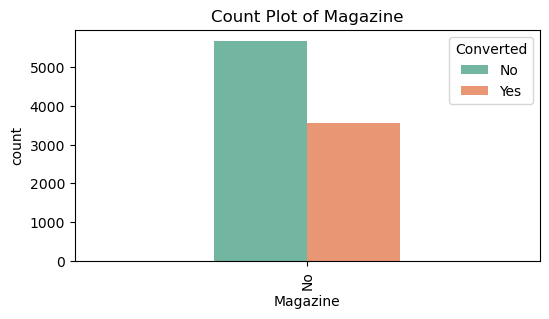

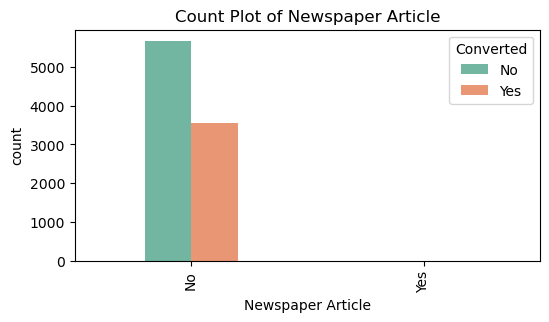

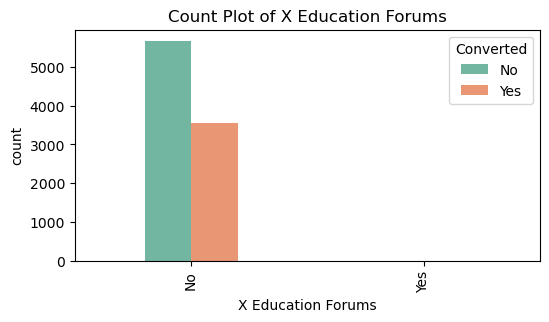

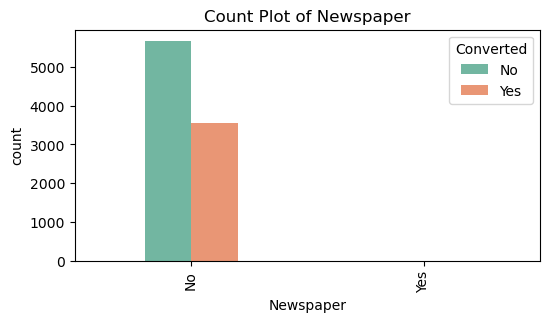

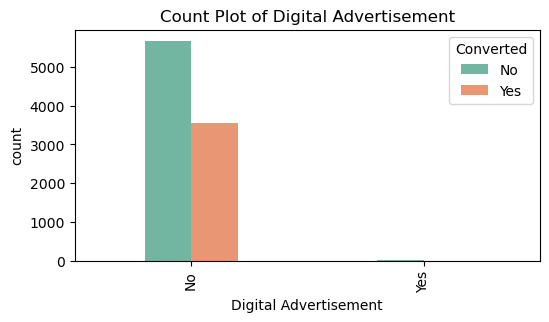

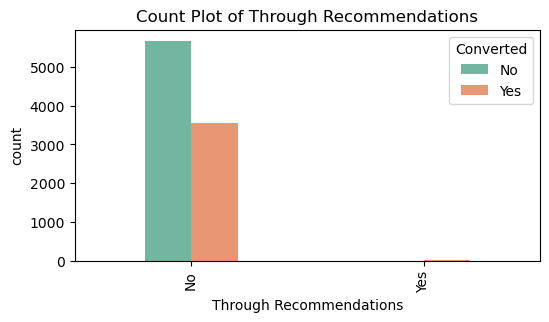

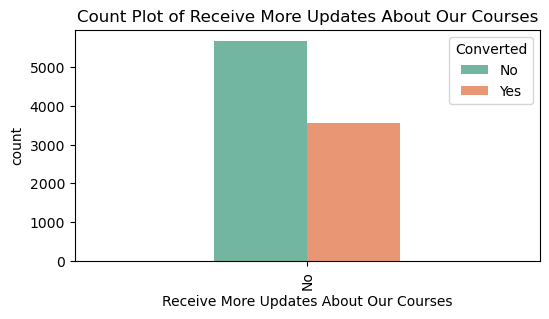

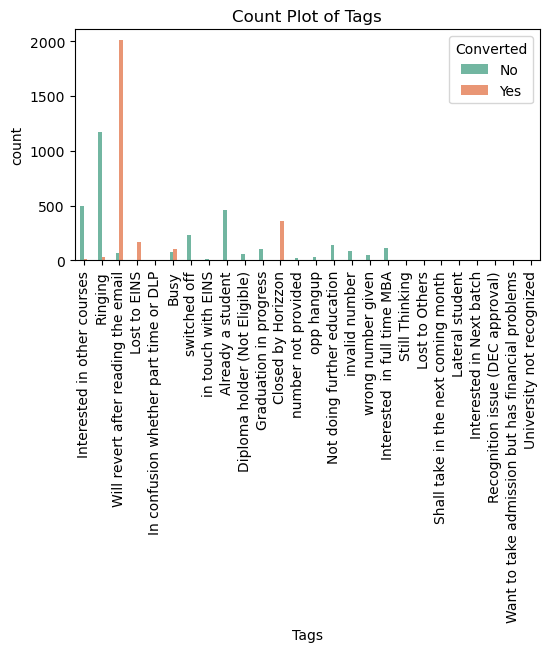

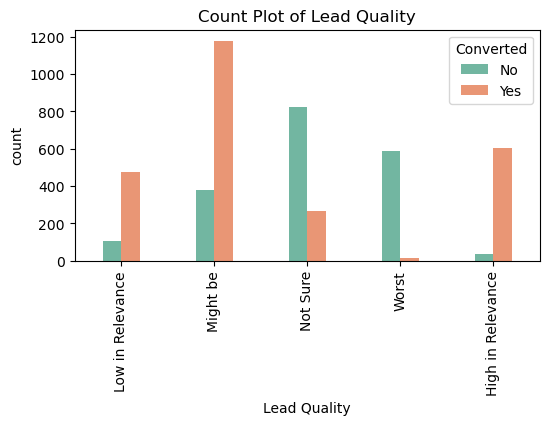

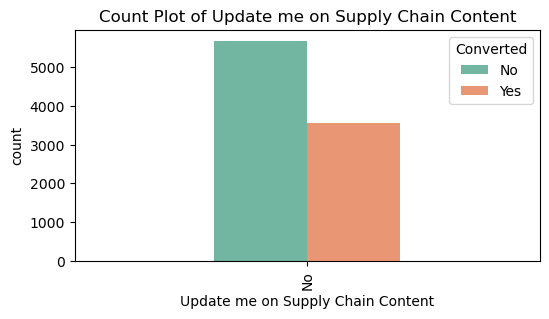

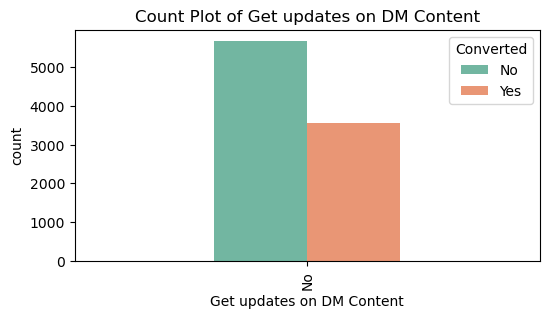

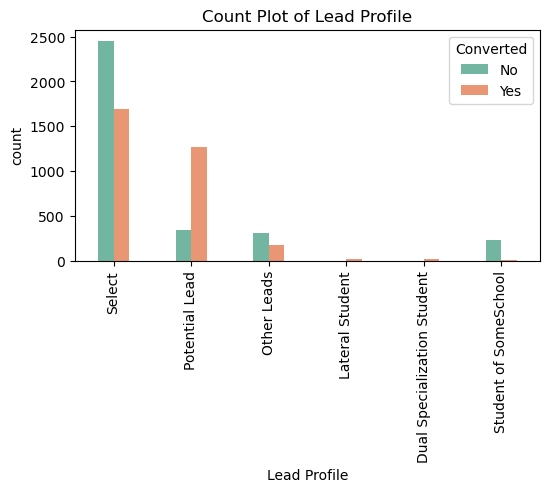

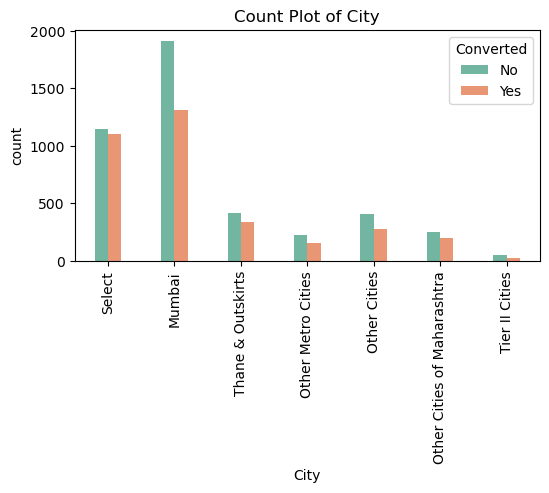

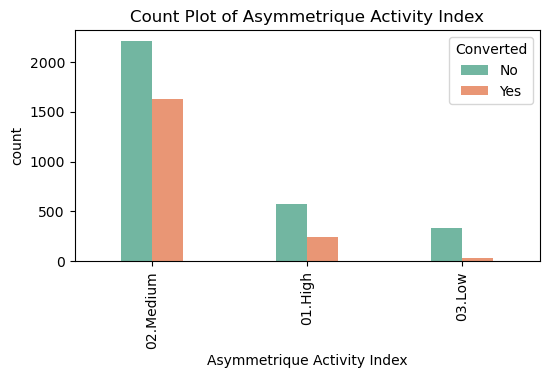

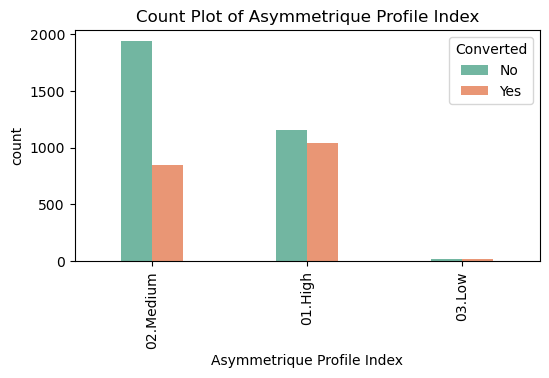

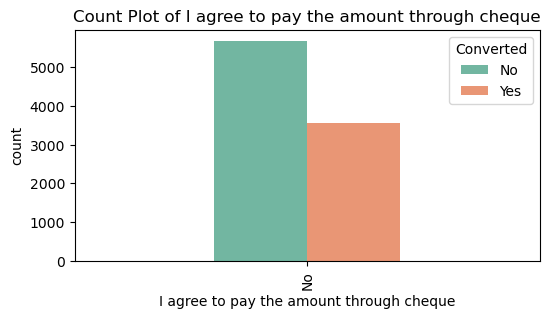

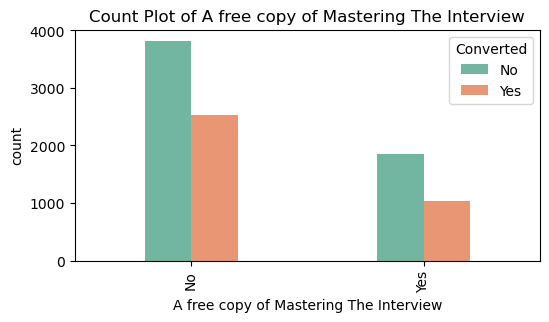

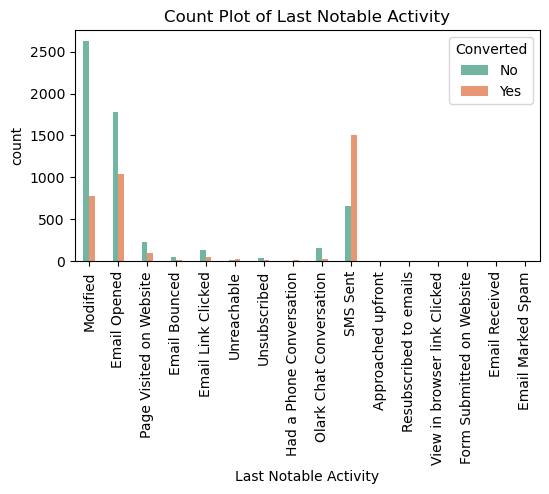

In [41]:
def create_all_count_plot(Lead,hue,palette='Set2',rotation=90):
    
    for column in categorical_columns:
        plt.figure(figsize=(6, 3))
        sns.countplot(x=column, hue=hue,palette=palette,data=Lead, width=0.4)
        plt.xticks(rotation=rotation)  # Rotate x-axis labels if necessary
        plt.title(f'Count Plot of {column}')
        plt.show()
        
create_all_count_plot(Lead, 'Converted', rotation=90)

In [42]:
#Checking the value counts of categorical columns
for column_name in categorical_columns:
    print(' - - - - - - - - - - - ')
    print(column_name)
    print(np.round((Lead[column_name].value_counts(normalize=True)*100),2))
    print(' - - - - - - - - - - - ')

 - - - - - - - - - - - 
Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
 - - - - - - - - - - - 
 - - - - - - - - - - - 
Lead Source
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64
 - - - - - - - - - - - 
 - - - - - - - - - - - 
Do Not Email
No     92.06
Yes     7.94
Name: Do Not Emai

# Step 3: Data Preparation

In [43]:
# Columns to be deleted based on above analysis 
## --> Columns with same values for converted / Nonconverted leads cannot be used in modelling as it adds no information
## --> Columns such as ID/ Numbers are not relevant in converting a lead 
## --> Columns with maximum null values
## Hence dropping the below columns
col_to_be_dropped = ['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call', 'Country', 
                     'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
                    'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque']

#Null values columns to be dropped
Null_col_drop


Final_col_to_be_dropped = col_to_be_dropped + Null_col_drop

#QC Check
print('Columns to be dropped based on null values',len(Null_col_drop))
print('Columns to be dropped based on categorical analysis',len(col_to_be_dropped))
print('Columns to be dropped in Final list',len(Final_col_to_be_dropped))

Columns to be dropped based on null values 11
Columns to be dropped based on categorical analysis 17
Columns to be dropped in Final list 28


In [44]:
#Dropping the columns defined above 
print("Total number of columns in the main dataframe",len(Lead.columns.to_list()))
Lead.drop(columns=Final_col_to_be_dropped,axis=1,inplace=True)
print("Total number of columns to be dropped",len(Final_col_to_be_dropped))
print("Total number of columns after dropping in dataframe",len(Lead.columns.to_list()))

Total number of columns in the main dataframe 37
Total number of columns to be dropped 28
Total number of columns after dropping in dataframe 11


In [45]:
#Analyzing the final dataframe to be considered for modelling
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   object 
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          7802 non-null   object 
 8   City                                    7820 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [46]:
# Dropping the columns from null value analysis which have been dropped above already
col_cat_to_be_excluded = ['What matters most to you in choosing a course','Country']
Lead_null_cat_col      = list(set(Lead_null_cat_col) - set(col_cat_to_be_excluded))
Lead_null_cat_col

['City', 'Specialization', 'Last Activity', 'Lead Source']

In [47]:
#Null value analysis of categorical column
np.round((Lead[Lead_null_cat_col].isnull().sum()/len(Lead[Lead_null_cat_col]))*100,2)

City              15.37
Specialization    15.56
Last Activity      1.11
Lead Source        0.39
dtype: float64

In [48]:
#Dropping the null rows from all the above columns
Lead = Lead.dropna(subset = ["City","Lead Source","Specialization","Last Activity"])

In [49]:
#Checking if there is still any null values present
(Lead.isna().sum()/len(Lead))*100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [50]:
#Checking number of rows left after removing null values

Lead.shape

(7651, 11)

In [51]:
#Even after removing the null values we are remained with 82.80% of data
(7651/9240)*100

82.8030303030303

In [52]:
#Final dataset
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7651 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7651 non-null   object 
 1   Lead Source                             7651 non-null   object 
 2   Converted                               7651 non-null   object 
 3   TotalVisits                             7651 non-null   float64
 4   Total Time Spent on Website             7651 non-null   int64  
 5   Page Views Per Visit                    7651 non-null   float64
 6   Last Activity                           7651 non-null   object 
 7   Specialization                          7651 non-null   object 
 8   City                                    7651 non-null   object 
 9   A free copy of Mastering The Interview  7651 non-null   object 
 10  Last Notable Activity                   7651 non-null   obje

In [53]:
#Converting the target column "Converted" into yes and no 
Lead["Converted"] = Lead["Converted"].apply(lambda x: 1 if x=="Yes" else 0)

Lead["Converted"]

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 7651, dtype: int64

In [54]:
#Fetching out  all categorical columns

Lead_cat_column = Lead.select_dtypes(include=["object"]).columns.to_list()

Lead_cat_column

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [55]:
Lead["Specialization"].value_counts()

Select                               1860
Finance Management                    963
Human Resource Management             837
Marketing Management                  822
Operations Management                 498
Business Administration               395
IT Projects Management                366
Supply Chain Management               345
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                178
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

# Dummy Varibale Creation

In [56]:
Lead_dummies = pd.get_dummies(Lead[['Lead Origin','Lead Source','Last Activity','City','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

Lead         = pd.concat([Lead,Lead_dummies],axis=1)

In [57]:
#Dropping select category  and cocatinating it with the final dataframe
Lead_special = pd.get_dummies(Lead["Specialization"],prefix='Specialization')

Lead_special.drop(columns=["Specialization_Select"],axis=1,inplace=True)

Lead = pd.concat([Lead,Lead_special],axis=1)

In [58]:
#Dropping the coulumns for which dummy variables were created
print("Count of columns before dropping columns",Lead.shape)

Lead.drop(columns=Lead_cat_column,axis=1,inplace=True)

print("Count of columns after dropping columns",Lead.shape)

Count of columns before dropping columns (7651, 86)
Count of columns after dropping columns (7651, 79)


In [59]:
#EDA on Target variable 

Lead["Converted"].value_counts(normalize=True)

0    0.568945
1    0.431055
Name: Converted, dtype: float64

In [60]:
#As seen in above results here the classes are imbalanced hence we have decided to use SMOTE Analysis technique for balancing.

# Train-Test Split

In [61]:
# Features and target variable

x = Lead.drop(columns=["Converted"])# Independent variables

y = Lead["Converted"]# Dependent variable

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [63]:
#Check how the target variable is split between train and test dataset
print("Train dataset target variable split",y_train.value_counts(normalize=True))
print(' - - - - - - - - - - - - - - - - - -')
print("Test  dataset target variable split",y_test.value_counts(normalize=True))

Train dataset target variable split 0    0.570121
1    0.429879
Name: Converted, dtype: float64
 - - - - - - - - - - - - - - - - - -
Test  dataset target variable split 0    0.566202
1    0.433798
Name: Converted, dtype: float64


In [64]:
#Since the split here is not balanced lets make a stratified split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [65]:
#Check how the target variable is split between train and test dataset
print("Train dataset target variable split",y_train.value_counts(normalize=True))
print(' - - - - - - - - - - - - - - - - - -')
print("Test  dataset target variable split",y_test.value_counts(normalize=True))

Train dataset target variable split 0    0.569001
1    0.430999
Name: Converted, dtype: float64
 - - - - - - - - - - - - - - - - - -
Test  dataset target variable split 0    0.568815
1    0.431185
Name: Converted, dtype: float64


In [66]:
#Selecting the categorical features indices in a list
categorical_features = list(range(3,78))

In [67]:
#Applying SMOTE-NC analysis to balance the dataset

# Specify categorical feature indices
categorical_features = [0, 1]

# Apply SMOTE-NC
smote_nc                 = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Check the class distribution
print("y_train")
print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_resampled))

print(' - - - - - - - - - - -')
print(y_train.shape)
print(y_resampled.shape)

print(' - - - - - - - - - - -')
print("X_train")
print("Original dataset shape:", X_train.shape)
print("Resampled dataset shape:", X_resampled.shape)

y_train
Original dataset shape: Counter({0: 3047, 1: 2308})
Resampled dataset shape: Counter({1: 3047, 0: 3047})
 - - - - - - - - - - -
(5355,)
(6094,)
 - - - - - - - - - - -
X_train
Original dataset shape: (5355, 78)
Resampled dataset shape: (6094, 78)


In [68]:
#Scaling the data
scaler = StandardScaler()

X_train_col = X_train.columns
X_test_col = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train, columns=X_train_col)
X_test_scaled = pd.DataFrame(X_test, columns=X_test_col)

In [69]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,-0.741573,-0.967223,-1.197022,-1.299847,3.463751,-0.061228,-0.689942,-0.062746,-0.692302,-0.019329,...,-0.22772,-0.153964,-0.343105,-0.170341,-0.263228,-0.117561,-0.102801,-0.071187,-0.214716,-0.169177
1,-0.162382,-0.650299,-0.522586,-1.299847,-0.288704,-0.061228,-0.689942,-0.062746,1.444457,-0.019329,...,-0.22772,-0.153964,-0.343105,-0.170341,-0.263228,-0.117561,-0.102801,-0.071187,-0.214716,-0.169177
2,-0.162382,-0.412606,-0.522586,0.769321,-0.288704,-0.061228,1.449397,-0.062746,-0.692302,-0.019329,...,-0.22772,-0.153964,-0.343105,-0.170341,-0.263228,-0.117561,-0.102801,-0.071187,4.657325,-0.169177
3,0.030681,0.606592,-0.297774,0.769321,-0.288704,-0.061228,1.449397,-0.062746,-0.692302,-0.019329,...,-0.22772,-0.153964,-0.343105,-0.170341,-0.263228,-0.117561,-0.102801,-0.071187,-0.214716,-0.169177
4,-0.741573,-0.967223,-1.197022,-1.299847,-0.288704,-0.061228,-0.689942,-0.062746,-0.692302,-0.019329,...,-0.22772,-0.153964,-0.343105,-0.170341,-0.263228,-0.117561,-0.102801,-0.071187,-0.214716,-0.169177


# Step 5 : Model building and evaluation

In [70]:
#Feature selection using RFE
#Creating an object of logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)#increase max iterator

# running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train_scaled, y_train)

#Making a list of 15 variables
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

# Storing 15 variables in col list
col = X_train_scaled.columns[rfe.support_]

#Adding these 15 variables to the train set
X_train_scaled = X_train_scaled[col].copy(deep=True)
X_test_scaled  = X_test_scaled[col].copy(deep=True)

In [71]:
#Building model

import statsmodels.api as sm

def model_building(X_train, X_test, y_train, y_test):
    
    y_train = y_train.values.reshape(-1)
    y_test  = y_test.values.reshape(-1)
    
    #adding constant
    X_train_sm = sm.add_constant(X_train)
    X_test_sm  = sm.add_constant(X_test)
    
    #building model & summary
    logm     = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())  
    lr_model = logm.fit()
    print(lr_model.summary())
    
    #Predicting from model built
    y_train_pred = lr_model.predict(X_train_sm)
    y_test_pred =  lr_model.predict(X_test_sm)
    
    return y_train_pred, y_test_pred

In [72]:
def metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    
    # Converting the predicted probabilities into discrete values
    y_train_pred_df = pd.DataFrame(y_train_pred).rename(columns={0: 'y_train_prob'})
    y_train_pred_df['y_train_values'] = y_train_pred_df['y_train_prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    y_test_pred_df = pd.DataFrame(y_test_pred).rename(columns={0: 'y_test_prob'})
    y_test_pred_df['y_test_values'] = y_test_pred_df['y_test_prob'].apply(lambda x: 1 if x >= threshold else 0)
    
    # Calculate Accuracy
    Train_accuracy = accuracy_score(y_train, y_train_pred_df['y_train_values'])
    Test_accuracy = accuracy_score(y_test, y_test_pred_df['y_test_values'])
    print('          Accuracy Score')
    print('- - - - - - - - - - - - - - - - - - - - - ')
    print(f'Train_Accuracy  : {np.round(Train_accuracy*100,2)}')
    print(f'Test_Accuracy   : {np.round(Test_accuracy*100,2)}')

    # Calculate Precision
    Train_precision = precision_score(y_train, y_train_pred_df['y_train_values'])
    Test_precision = precision_score(y_test, y_test_pred_df['y_test_values'])
    print('- - - - - - - - - - - - - - - - - - - - - ')
    print('          Precision Score')
    print(f'Train_precision : {np.round(Train_precision*100,2)}')
    print(f'Test_Precision  : {np.round(Test_precision*100,2)}')
    
    # Calculate Recall (Sensitivity)
    Train_recall = recall_score(y_train, y_train_pred_df['y_train_values'])
    Test_recall = recall_score(y_test, y_test_pred_df['y_test_values'])
    print('- - - - - - - - - - - - - - - - - - - - - ')
    print('           Sensitivity')
    print(f'Train_Recall (Sensitivity) : {np.round(Train_recall*100,2)}')
    print(f'Test_Recall (Sensitivity)  : {np.round(Test_recall*100,2)}')
    
    # Generate the confusion matrix
    print('- - - - - - - - - - - - - - - - - - - - - ')
    print('          Confusion Matrix')
    Train_cm = confusion_matrix(y_train, y_train_pred_df['y_train_values'])
    Test_cm = confusion_matrix(y_test, y_test_pred_df['y_test_values'])
    print('Train Confusion Matrix:')
    print(Train_cm)
    print('  ')
    print('Test Confusion Matrix:')
    print(Test_cm)
    
    # Calculate Specificity
    Train_specificity = Train_cm[0, 0] / (Train_cm[0, 0] + Train_cm[0, 1])
    Test_specificity = Test_cm[0, 0] / (Test_cm[0, 0] + Test_cm[0, 1])

    print('- - - - - - - - - - - - - - - -')
    print(f'Train_Specificity : {np.round(Train_specificity*100,2)}')
    print(f'Test_Specificity  : {np.round(Test_specificity*100,2)}')
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    y_train_pred_df1 = pd.DataFrame()
    for i in numbers:
        y_train_pred_df1[i] = y_train_pred_df['y_train_prob'].map(lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1      = confusion_matrix(y_train, y_train_pred_df1[i])
        total1   = sum(sum(cm1))
        
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    plt.figure(figsize = (3,3))
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [73]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    # Calculate the ROC curve and AUC for the training set
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # Calculate the ROC curve and AUC for the test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot the ROC curves
    plt.figure(figsize=(3, 3))
    
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [74]:
#Function to return VIF from X_train
def vif_cal(X):
    # Calculate VIF for each feature
    vif_data            = pd.DataFrame()
    vif_data['Feature'] = X_train_scaled.columns
    vif_data['VIF']     = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
    vif_data['VIF']     = round(vif_data['VIF'], 2)
    vif_data            = vif_data.sort_values(by = "VIF", ascending = False)
    
    return vif_data

In [75]:
#Function to drop unwanted columns from train and test dataframe
def drop_features(X_train_scaled,X_test_scaled,columns_list):
    print(' - - - - - - QC Check for Train Data- - - - - - - ')
    print("No of columns in Train data before dropping",len(X_train_scaled.columns))
    X_train_scaled.drop(columns=columns_list,axis=1,inplace=True)
    print("No of columns in Train data after dropping",len(X_train_scaled.columns))
    print(' - - - - - - QC Check for Test Data- - - - - - - ')
    print("No of columns in Test data before dropping",len(X_test_scaled.columns))
    X_test_scaled.drop(columns=columns_list,axis=1,inplace=True)
    print("No of columns in Test data after dropping",len(X_test_scaled.columns))
    return X_train_scaled,X_test_scaled

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5355
Model:                            GLM   Df Residuals:                     5339
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.8
Date:                Mon, 19 Aug 2024   Deviance:                       5075.6
Time:                        00:47:44   Pearson chi2:                 5.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3425
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<Figure size 300x300 with 0 Axes>

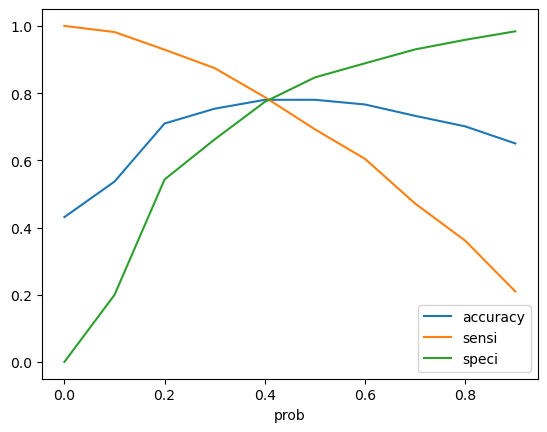

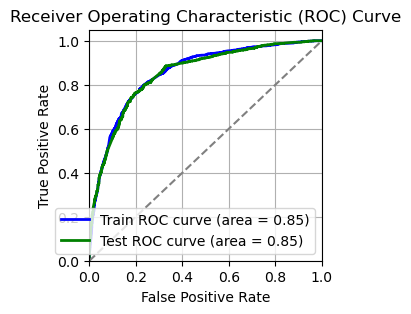

                                  Feature    VIF
2                 Lead Origin_Lead Import  21.00
4                    Lead Source_Facebook  20.99
3              Lead Source_Direct Traffic   4.17
1     Lead Origin_Landing Page Submission   3.61
5                      Lead Source_Google   3.34
12                            City_Select   2.66
6              Lead Source_Organic Search   2.32
7                   Lead Source_Reference   1.45
13         Last Notable Activity_Modified   1.32
14         Last Notable Activity_SMS Sent   1.26
11  Last Activity_Olark Chat Conversation   1.22
0             Total Time Spent on Website   1.21
8            Lead Source_Welingak Website   1.13
10            Last Activity_Email Bounced   1.06
9                      Lead Source_google   1.01


In [76]:
#Step 1 --> Model building based on sclaed features and final features selected by RFE 
y_train_pred, y_test_pred = model_building(X_train_scaled, X_test_scaled, y_train, y_test)

#Step 2 --> Model Evaluation
metrics(y_train,y_train_pred,y_test,y_test_pred,threshold=0.5)

#Step 3 --> Checking model ROC Curve
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#Step 4 --> Checking VIF of the variables
vif_data = vif_cal(X_train_scaled)
print(vif_data)

 - - - - - - QC Check for Train Data- - - - - - - 
No of columns in Train data before dropping 15
No of columns in Train data after dropping 14
 - - - - - - QC Check for Test Data- - - - - - - 
No of columns in Test data before dropping 15
No of columns in Test data after dropping 14
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5355
Model:                            GLM   Df Residuals:                     5340
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.4
Date:                Mon, 19 Aug 2024   Deviance:                       5076.8
Time:                        00:47:46   Pearson chi2:                 5.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3424
Cova

<Figure size 300x300 with 0 Axes>

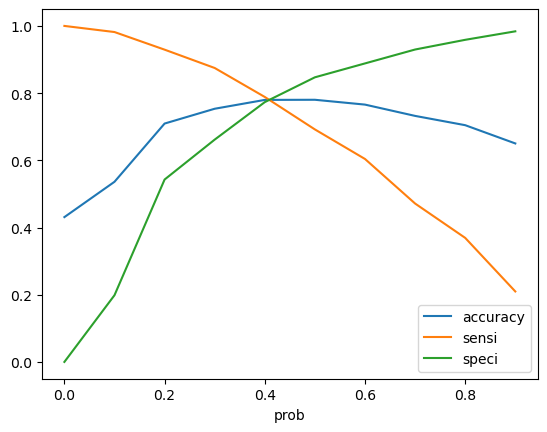

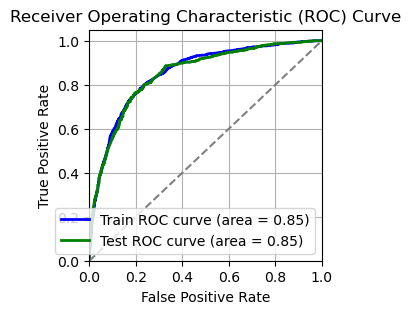

                                  Feature   VIF
2              Lead Source_Direct Traffic  4.17
1     Lead Origin_Landing Page Submission  3.60
4                      Lead Source_Google  3.34
11                            City_Select  2.66
5              Lead Source_Organic Search  2.32
6                   Lead Source_Reference  1.45
12         Last Notable Activity_Modified  1.32
13         Last Notable Activity_SMS Sent  1.26
10  Last Activity_Olark Chat Conversation  1.22
0             Total Time Spent on Website  1.21
7            Lead Source_Welingak Website  1.13
3                    Lead Source_Facebook  1.06
9             Last Activity_Email Bounced  1.06
8                      Lead Source_google  1.01


In [77]:
## Dropping column 'Lead Origin_Lead Import' which has highest VIF & Retraining the model

#Step 0 --> Function to drop unwanted variables and modify the training and testing dataset
X_train_scaled,X_test_scaled = drop_features(X_train_scaled,X_test_scaled,['Lead Origin_Lead Import'])

#Step 1 --> Model building based on sclaed features and final features selected by RFE 
y_train_pred, y_test_pred = model_building(X_train_scaled, X_test_scaled, y_train, y_test)

#Step 2 --> Model Evaluation
metrics(y_train,y_train_pred,y_test,y_test_pred,threshold=0.5)

#Step 3 --> Checking model ROC Curve
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#Step 4 --> Checking VIF of the variables
vif_data = vif_cal(X_train_scaled)
print(vif_data)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5355
Model:                            GLM   Df Residuals:                     5340
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.4
Date:                Mon, 19 Aug 2024   Deviance:                       5076.8
Time:                        00:50:43   Pearson chi2:                 5.60e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3424
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<Figure size 300x300 with 0 Axes>

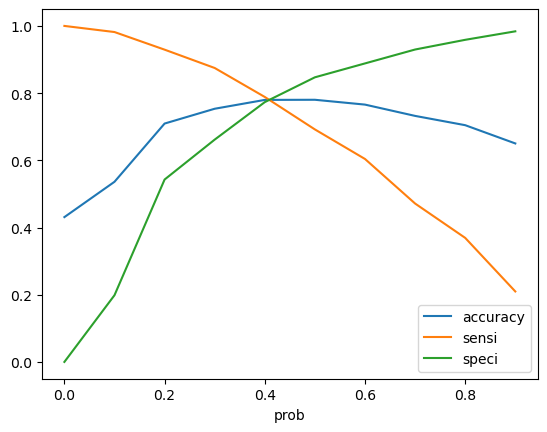

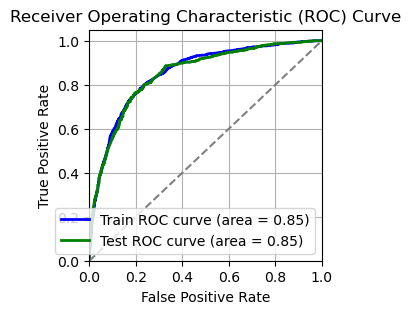

                                  Feature   VIF
2              Lead Source_Direct Traffic  4.17
1     Lead Origin_Landing Page Submission  3.60
4                      Lead Source_Google  3.34
11                            City_Select  2.66
5              Lead Source_Organic Search  2.32
6                   Lead Source_Reference  1.45
12         Last Notable Activity_Modified  1.32
13         Last Notable Activity_SMS Sent  1.26
10  Last Activity_Olark Chat Conversation  1.22
0             Total Time Spent on Website  1.21
7            Lead Source_Welingak Website  1.13
3                    Lead Source_Facebook  1.06
9             Last Activity_Email Bounced  1.06
8                      Lead Source_google  1.01


In [79]:
#Selecting the threshold as 0.4 as suggested by the graph 

#Step 1 --> Model building based on sclaed features and final features selected by RFE 
y_train_pred, y_test_pred = model_building(X_train_scaled, X_test_scaled, y_train, y_test)

#Step 2 --> Model Evaluation
metrics(y_train,y_train_pred,y_test,y_test_pred,threshold=0.4)

#Step 3 --> Checking model ROC Curve
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#Step 4 --> Checking VIF of the variables
vif_data = vif_cal(X_train_scaled)
print(vif_data)

 - - - - - - QC Check for Train Data- - - - - - - 
No of columns in Train data before dropping 14
No of columns in Train data after dropping 13
 - - - - - - QC Check for Test Data- - - - - - - 
No of columns in Test data before dropping 14
No of columns in Test data after dropping 13
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5355
Model:                            GLM   Df Residuals:                     5341
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.2
Date:                Mon, 19 Aug 2024   Deviance:                       5080.5
Time:                        00:53:13   Pearson chi2:                 5.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3419
Cova

<Figure size 300x300 with 0 Axes>

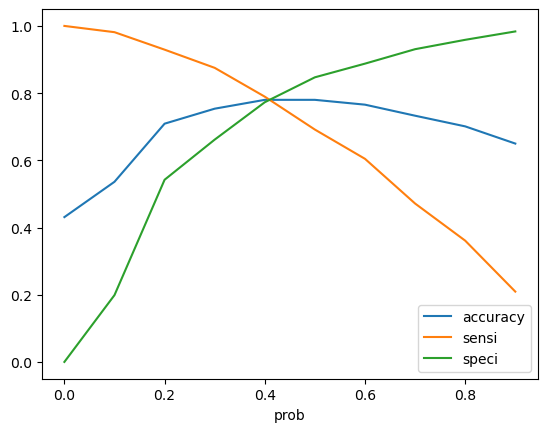

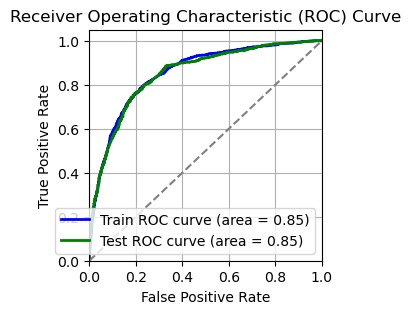

                                  Feature   VIF
2              Lead Source_Direct Traffic  4.14
1     Lead Origin_Landing Page Submission  3.60
4                      Lead Source_Google  3.32
10                            City_Select  2.66
5              Lead Source_Organic Search  2.31
6                   Lead Source_Reference  1.45
11         Last Notable Activity_Modified  1.32
12         Last Notable Activity_SMS Sent  1.26
9   Last Activity_Olark Chat Conversation  1.22
0             Total Time Spent on Website  1.21
7            Lead Source_Welingak Website  1.13
3                    Lead Source_Facebook  1.06
8             Last Activity_Email Bounced  1.06


In [80]:
## Dropping column 'Lead Source_google' which has p value greater than 0.05 & Retraining the model

#Step 0 --> Function to drop unwanted variables and modify the training and testing dataset
X_train_scaled,X_test_scaled = drop_features(X_train_scaled,X_test_scaled,['Lead Source_google'])

#Step 1 --> Model building based on sclaed features and final features selected by RFE 
y_train_pred, y_test_pred = model_building(X_train_scaled, X_test_scaled, y_train, y_test)

#Step 2 --> Model Evaluation
metrics(y_train,y_train_pred,y_test,y_test_pred,threshold=0.5)

#Step 3 --> Checking model ROC Curve
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#Step 4 --> Checking VIF of the variables
vif_data = vif_cal(X_train_scaled)
print(vif_data)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5355
Model:                            GLM   Df Residuals:                     5341
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.2
Date:                Mon, 19 Aug 2024   Deviance:                       5080.5
Time:                        00:54:24   Pearson chi2:                 5.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3419
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<Figure size 300x300 with 0 Axes>

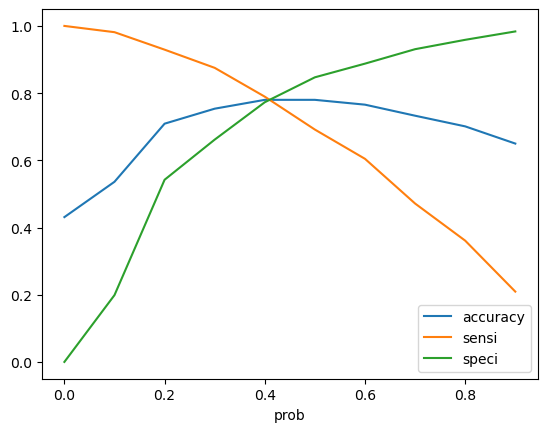

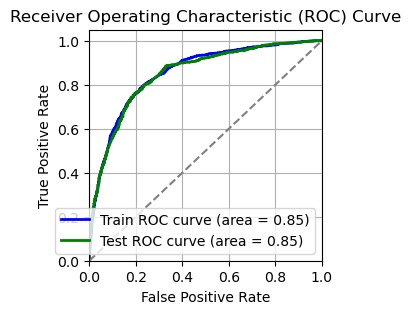

                                  Feature   VIF
2              Lead Source_Direct Traffic  4.14
1     Lead Origin_Landing Page Submission  3.60
4                      Lead Source_Google  3.32
10                            City_Select  2.66
5              Lead Source_Organic Search  2.31
6                   Lead Source_Reference  1.45
11         Last Notable Activity_Modified  1.32
12         Last Notable Activity_SMS Sent  1.26
9   Last Activity_Olark Chat Conversation  1.22
0             Total Time Spent on Website  1.21
7            Lead Source_Welingak Website  1.13
3                    Lead Source_Facebook  1.06
8             Last Activity_Email Bounced  1.06


In [81]:
#Selecting the threshold as 0.4 as suggested by the graph 

#Step 1 --> Model building based on sclaed features and final features selected by RFE 
y_train_pred, y_test_pred = model_building(X_train_scaled, X_test_scaled, y_train, y_test)

#Step 2 --> Model Evaluation
metrics(y_train,y_train_pred,y_test,y_test_pred,threshold=0.4)

#Step 3 --> Checking model ROC Curve
plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred)

#Step 4 --> Checking VIF of the variables
vif_data = vif_cal(X_train_scaled)
print(vif_data)